# Box Office Revenue Prediction and Analysis - Machine Learning
## *Predicting a box office success - what drives revenue?*

### Variables: 
 - Features (explanatory variables):
   log_budget, popularity, vote_average, vote_count, release_year, release_month, runtime
 - Target (response variable): revenue

### Machine Learning Models
 - `Linear Regression` - baseline model that assumes linear relationship between features and revenue.
 - `Random forest`- an ensemble* model that builds several decision trees on subsets that are randomized and then averages their predictions. This model reduces overfitting and also captures non-linear relationships.
 - `Gradient boosting` - also an ensemble model. It builds trees sequentially where each new tree focus on correcting the errors of the previous tree. This model may sometimes be more powerful but compared to Random Forest it requires careful attention to the tuning of hyperparameters (i.e. the number of trees, depth and learning rate) for it to work efficiently. 

### Content
 1. **Introduction**
  - Overview and the purpose of the project. The variables are defined here. 
 2. **Data cleaning**
  - Checking that the data is ready for analysis by looking at missing values and fixing data types that are incorrect. 
 3. **Feature Engineering**
  - Applying log transformation on skewed data and creates new features and transformations
 4. **Train-test split and data validation**
  - Splits the dataset into training data and testing data. Also have pre-checks for data validity, feature scaling and ranges before model testing.
 5. **Machine Learning models**
  - Trains and evalutes Machine Learning models like Linear Regression, Random Forest and Gradient Boosting. They are then compared with R2 and RMSE for analyzing their explanatory power on the target variable.
 6. **Future work**
  - Suggestions for improvements in future studies and also limiations of the project here.
 7. **References**
  - Dataset and libraries used in the project. 

*- *ensemble*  = combines the predictions of several simpler models into one stronger and more accurate model. 

## 1. Introduction

**1.1. Overview**
- This project seeks to understand what makes some movies get high revenue while others get low revenue and to predict the determinants for a successful box office movie. As there are small-budget movies at 10 million USD to blockbuster movies at over 1 billion USD there is a case for understanding whether bigger is better (more budget, more revenue) or if there are other factors driving higher revenue. 

**1.2. Purpose**
- The purpose of this project is to explain and predict how a movie can become a box office success in terms of revenue. This will be made using TMDB database over 5000 movies from the [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/data) website.

**1.3. Defining the variables and their relevance**
- **1.3.1. Features (Explanatory variables):**
    - **budget (log_budget):** the totalt amount of production cost of the movie. A higher budget suggests that the movie would have a higher revenue. 
    - **popularity:** based on user activity on TMDB's site like views and ratings. The higher popularity a movie has, the more it may have in revenue because a case can be made that it would have a relatively high popularity since its theatrical release. 
    - **vote_average:** the average user vote rating of the movie ranging 1-10. A higher average vote would suggest a more popular movie and therefore higher revenue in comparison to low vote average.
    - **vote_count:** number of times votes have been made on the movie, where the assumption is the more votes the more visibility.
    - **release_year:** the year the movie was released. This variable may highlight important temporal trends in the movie business, where a specific year engaged more audience for example.
    - **release_month:** the month the movie was released. Like the release_year variable, this variable may capture important trends in the summer, winter or other seasonal trends in the movie business.
    - **runtime:** the amount of time or length of the movie. Two assumptions can be made here: 1) shorter movies (approximately less than 2 hours) can lead to more screenings and good audience engagement, whereas 2) longer movies may have a more complex and deeper story and characters but less audience engagement.
- **1.3.2. Target (Response variable):**
    - **revenue (log_revenue):** this variable, also interchangeably called 'movie revenue', is the *total amount of money a movie have grossed worldwide after its theatrical release*. The ambition here is to examine to which extent the features will predict revenue because revenue is a strong indicator of whether the movie was deemed a box office success.

## 2. Data cleaning

In [1]:
# Data management
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set_theme(style="whitegrid") # easy-to-read graphs
%matplotlib inline 


df = pd.read_csv("../data/tmdb_5000_movies.csv") # reads data from csv.file
df.head() # Shows the first five rows 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## 2.1. The amount of missing values in every column 

In [2]:
df.isnull().sum().sort_values(ascending=False) 

homepage                3091
tagline                  844
overview                   3
runtime                    2
release_date               1
budget                     0
vote_average               0
title                      0
status                     0
spoken_languages           0
revenue                    0
production_countries       0
genres                     0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
vote_count                 0
dtype: int64

## 2.2. Revenue, budget and profit - cleaning data with replacing 0 for NA

In [5]:
df["budget"] = df["budget"].replace(0, pd.NA) # replaces 0 for NA in budget
df["revenue"] = df["revenue"].replace(0, pd.NA) # replaces 0 for NA in revenue

df_clean = df.dropna(subset=["budget", "revenue"]).copy() # removes movies with no budget or no revenue

df_clean["profit"] = df_clean["revenue"] - df_clean["budget"] # create a new column with profit

df_clean["release_year"] = pd.to_datetime(df_clean["release_date"], errors="coerce").dt.year # extracts year from column release_date to illustrate movie name followed by year produced

## 2.3. These lines below prints out a scatterplot between budget and revenue

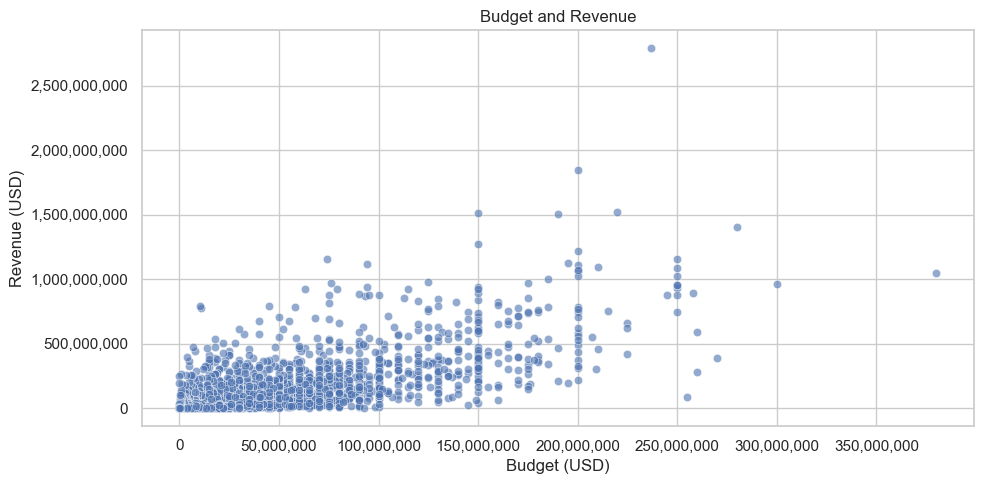

In [4]:
# these lines below prints out a scatterplot between budget and revenue
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_clean, x="budget", y="revenue", alpha=0.6)
plt.title("Budget and Revenue")
plt.xlabel("Budget (USD)")
plt.ylabel("Revenue (USD)")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{int(y):,}"))
plt.tight_layout()
plt.show()

In [56]:
# Idenftifying the top outliers based on budget and revenue and profit

# calculate the 99th percentile thresholds for budget and revenue
budget_threshold = df_clean["budget"].quantile(0.99)
revenue_threshold = df_clean["revenue"].quantile(0.99)

# identify outliers based on these thresholds
outliers = df_clean[
    (df_clean["budget"] >= budget_threshold) |
    (df_clean["revenue"] >= revenue_threshold)
].copy()

# add release year to outliers dataframe
outliers["release_year"] = df_clean.loc[outliers.index, "release_year"]

# ==== 1. Top 10 outliers based on budget ====
top_budget = outliers.sort_values(by="budget", ascending=False).head(10).copy()

# ==== 2. Top 10 outliers based on revenue ====
top_revenue = outliers.sort_values(by="revenue", ascending=False).head(10).copy()

# ==== 3. Top 10 outliers based on profit ====
top_profit = outliers.sort_values(by="profit", ascending=False).head(10).copy()

# format columns for easier reading
def format_table(df, cols=["budget", "revenue", "profit"]):
    formatted = df[["title", "release_year"] + cols].copy()
    for col in cols:
        formatted[col] = formatted[col].apply(lambda x: f"{int(x):,}") # format numbers with commas
    return formatted

formatted_budget = format_table(top_budget)
formatted_revenue = format_table(top_revenue)
formatted_profit = format_table(top_profit) 


print("Top 10 Outliers Based on Budget:")
display(formatted_budget)

print("\nTop 10 Outliers Based on Revenue:")
display(formatted_revenue)

print("\nTop 10 Outliers Based on Profit:")
display(formatted_profit)

Top 10 Outliers Based on Budget:


,title,release_year,budget,revenue,profit
17,Pirates of the Caribbean: On Stranger Tides,2011,"380,000,000","1,045,713,802","665,713,802"
1,Pirates of the Caribbean: At World's End,2007,"300,000,000","961,000,000","661,000,000"
7,Avengers: Age of Ultron,2015,"280,000,000","1,405,403,694","1,125,403,694"
10,Superman Returns,2006,"270,000,000","391,081,192","121,081,192"
4,John Carter,2012,"260,000,000","284,139,100","24,139,100"
6,Tangled,2010,"260,000,000","591,794,936","331,794,936"
5,Spider-Man 3,2007,"258,000,000","890,871,626","632,871,626"
13,The Lone Ranger,2013,"255,000,000","89,289,910","-165,710,090"
22,The Hobbit: The Desolation of Smaug,2013,"250,000,000","958,400,000","708,400,000"
26,Captain America: Civil War,2016,"250,000,000","1,153,304,495","903,304,495"



Top 10 Outliers Based on Revenue:


,title,release_year,budget,revenue,profit
0,Avatar,2009,"237,000,000","2,787,965,087","2,550,965,087"
25,Titanic,1997,"200,000,000","1,845,034,188","1,645,034,188"
16,The Avengers,2012,"220,000,000","1,519,557,910","1,299,557,910"
28,Jurassic World,2015,"150,000,000","1,513,528,810","1,363,528,810"
44,Furious 7,2015,"190,000,000","1,506,249,360","1,316,249,360"
7,Avengers: Age of Ultron,2015,"280,000,000","1,405,403,694","1,125,403,694"
124,Frozen,2013,"150,000,000","1,274,219,009","1,124,219,009"
31,Iron Man 3,2013,"200,000,000","1,215,439,994","1,015,439,994"
546,Minions,2015,"74,000,000","1,156,730,962","1,082,730,962"
26,Captain America: Civil War,2016,"250,000,000","1,153,304,495","903,304,495"



Top 10 Outliers Based on Profit:


,title,release_year,budget,revenue,profit
0,Avatar,2009,"237,000,000","2,787,965,087","2,550,965,087"
25,Titanic,1997,"200,000,000","1,845,034,188","1,645,034,188"
28,Jurassic World,2015,"150,000,000","1,513,528,810","1,363,528,810"
44,Furious 7,2015,"190,000,000","1,506,249,360","1,316,249,360"
16,The Avengers,2012,"220,000,000","1,519,557,910","1,299,557,910"
7,Avengers: Age of Ultron,2015,"280,000,000","1,405,403,694","1,125,403,694"
124,Frozen,2013,"150,000,000","1,274,219,009","1,124,219,009"
546,Minions,2015,"74,000,000","1,156,730,962","1,082,730,962"
329,The Lord of the Rings: The Return of the King,2003,"94,000,000","1,118,888,979","1,024,888,979"
31,Iron Man 3,2013,"200,000,000","1,215,439,994","1,015,439,994"


## 2.4. Identifying outliers in the scatterplot
- We will filtrate movies that have a very high budget or revenue by using the 99th percentile as a benchmark

## 2.5. Visualizing budget versus revenue for the chosen titles

/var/folders/6g/t7zfh25d519fq1215_q0236h0000gn/T/ipykernel_19045/2684590593.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outliers["revenue"]
/var/folders/6g/t7zfh25d519fq1215_q0236h0000gn/T/ipykernel_19045/2684590593.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outliers["budget"]


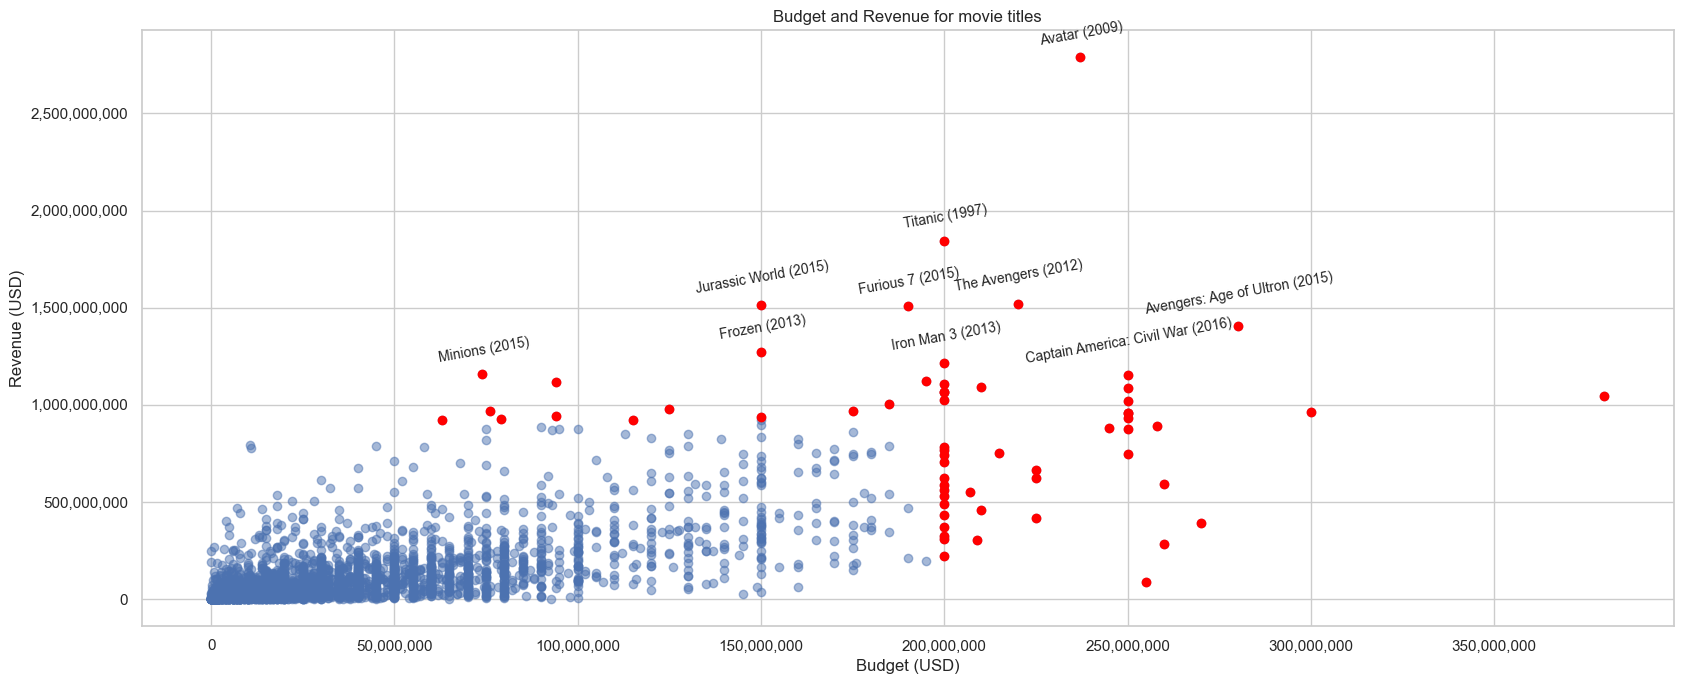

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(17, 7))

outliers["revenue"] = (
    outliers["revenue"]
    .replace(r"[\$,]", "", regex=True)
    .astype(float)  # converting revenue from object to float
)

outliers["budget"] = (
    outliers["budget"]
    .replace(r"[\$,]", "", regex=True)
    .astype(float)
)

# scatterplot showing all movies
plt.scatter(df_clean["budget"], df_clean["revenue"], alpha=0.5)

#highlighting outliers
plt.scatter(outliers["budget"], outliers["revenue"], color="red")

#annotating only top 10 outliers in revenue
subset = outliers.nlargest(10, "revenue")
for _, row in subset.iterrows():
    plt.annotate(
        f"{row['title']} ({int(row['release_year'])})" if pd.notnull(row['release_year']) else row ['title'],
        (row['budget'], row['revenue']),
        xytext=(1, 9),
        textcoords="offset points",
        fontsize=10,
        rotation=10,
        ha="center"
    )

plt.title("Budget and Revenue for movie titles")
plt.xlabel("Budget (USD)")
plt.ylabel("Revenue (USD)")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{int(y):,}"))
plt.grid(True)
plt.tight_layout()
plt.show()

## The plot shows the top 10 most extreme outliers 
*Note:* There is also one extreme outlier that does not have a label: The Pirates of the Caribbean: On Stranger Tides (2011). After a closer look, however, there is an explanation behind why the movie is not an extreme outlier like the other 10 cases. It has a budget of more than 350,000,000 USD but revenue well above 1,000,000,000 USD that makes it gain approximately 650,000,000 USD in profits. Compare this with Minions (2015) on the left side of the scatterplot that has a budget of almost 80,000,000 but a profit of over 1,000,000,000 which is a net profit of around 920,000,000 USD. 

*In summary:* the difference is that Pirates of the Caribbean (2011) is not an **outlier in profit** - where higher revenue is a necessary condition for higher profit - like Minions (2015) and the other 9 extreme outliers. It is instead an **outlier in budget** which may or may not lead to higher profits. It is beyond the scope of this project to go further with studying outliers in budget although it could be useful to focus at more in depth in further studies.

## 2.7. Add column that marks the outliers

In [10]:
df_clean["is_outlier"] = df_clean.index.isin(outliers.index)

In [11]:
## 2.8. Import outliers to separate CSV file

In [12]:
outliers.to_csv("outliers_movies.csv", index=False) # export outliers to CSV file in the root folder

In [13]:
df_clean.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'profit', 'release_year', 'is_outlier'],
      dtype='object')

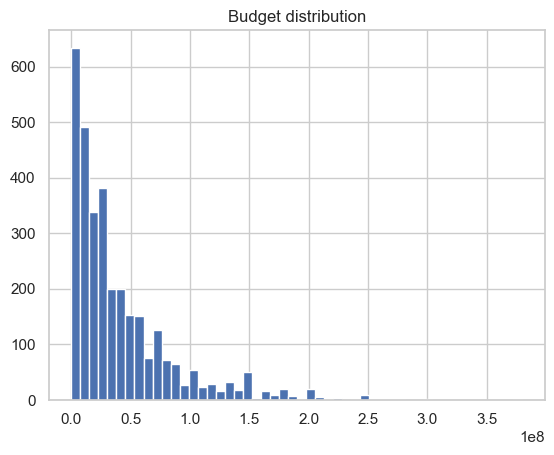

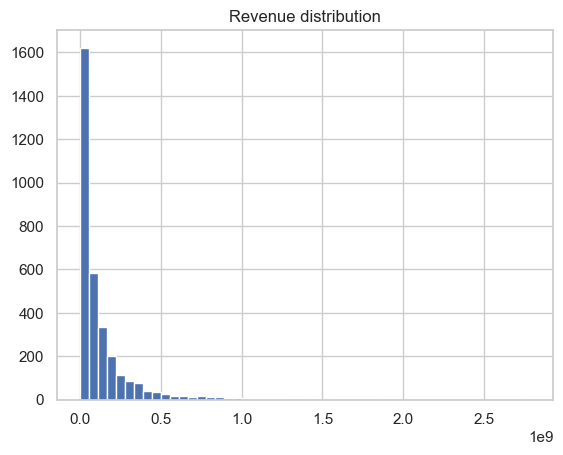

In [14]:
#Checking data for skewness
df_clean["budget"].hist(bins=50)
plt.title("Budget distribution")
plt.show()

df_clean["revenue"].hist(bins=50)
plt.title("Revenue distribution")
plt.show()



**Comments on Budget distribution and Revenue distribution histograms:** the histograms show that data is very skewed and thus we have to use log transformation to the compress the extreme values. Then we will have data that we can analyze. This will be done in the next part in 3.Feature Engineering below.

In [15]:
# Ensures that the data type is numeric for revenue and budget
df_clean["revenue"] = pd.to_numeric(df_clean["revenue"], errors="coerce")
df_clean["budget"] = pd.to_numeric(df_clean["budget"], errors="coerce")

# Replace NaN with 0 
df_clean["revenue"] = df_clean["revenue"].fillna(0)
df_clean["budget"] = df_clean["budget"].fillna(0)

# printing the results from cleaning data and replacing NaN with 0:
print(df_clean[["revenue", "budget"]].dtypes)
print(df_clean[["revenue", "budget"]].head())

revenue    int64
budget     int64
dtype: object
      revenue     budget
0  2787965087  237000000
1   961000000  300000000
2   880674609  245000000
3  1084939099  250000000
4   284139100  260000000


## 3. Feature Engineering 

#### In this section, we transform the skewed data and prepare the new features for the model

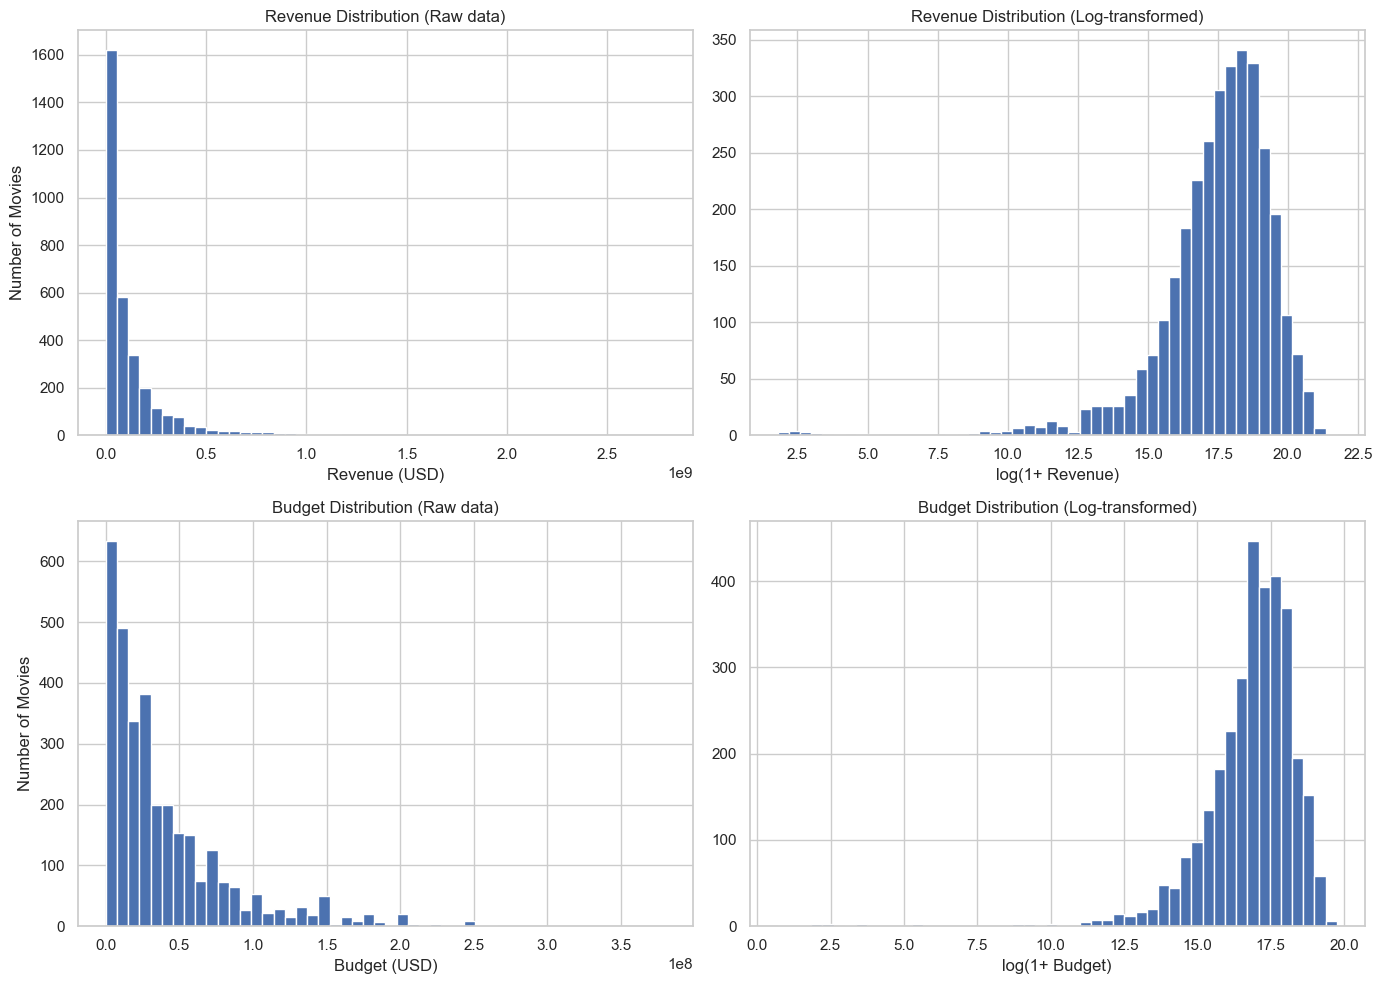

Raw vs Log (revenue):
Raw: 2,787,965,087 | Log Revenue: 21.75
Raw:  961,000,000 | Log Revenue: 20.68
Raw:  880,674,609 | Log Revenue: 20.60
Raw: 1,084,939,099 | Log Revenue: 20.80
Raw:  284,139,100 | Log Revenue: 19.46

Raw vs Log (budget):
Budget:  237,000,000 | Log Budget: 19.28
Budget:  300,000,000 | Log Budget: 19.52
Budget:  245,000,000 | Log Budget: 19.32
Budget:  250,000,000 | Log Budget: 19.34
Budget:  260,000,000 | Log Budget: 19.38

Features ready: (3229, 7) Target ready: (3229,)


In [16]:
# Step 1: Converting columns to numeric and datetime data types
df_clean["budget"] = pd.to_numeric(df_clean["budget"], errors="coerce")
df_clean["revenue"] = pd.to_numeric(df_clean["revenue"], errors="coerce")
df_clean["release_date"] = pd.to_datetime(df_clean["release_date"], errors="coerce")

# Step 2: extracting important time features from release_date
df_clean["release_year"] = df_clean["release_date"].dt.year
df_clean["release_month"] = df_clean["release_date"].dt.month

# Step 3: Log-transforming skewed numeric features
df_clean["log_budget"] = np.log1p(df_clean["budget"])  # log(1+x) avoids log(0)
df_clean["log_revenue"] = np.log1p(df_clean["revenue"])

# Step 4: Visualizing the raw versus transformed features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Revenue before and after log transformation
df_clean["revenue"].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title("Revenue Distribution (Raw data)")
axes[0, 0].set_xlabel("Revenue (USD)")
axes[0, 0].set_ylabel("Number of Movies")

df_clean["log_revenue"].hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title("Revenue Distribution (Log-transformed)")
axes[0, 1].set_xlabel("log(1+ Revenue)")

# Budget before and after log transformation
df_clean["budget"].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title("Budget Distribution (Raw data)")
axes[1, 0].set_xlabel("Budget (USD)")
axes[1, 0].set_ylabel("Number of Movies")

df_clean["log_budget"].hist(bins=50, ax=axes[1, 1])
axes[1, 1].set_title("Budget Distribution (Log-transformed)")
axes[1, 1].set_xlabel("log(1+ Budget)")

plt.tight_layout()
plt.show()

# Step 5: Checking log mapping example - for previewing data
print("Raw vs Log (revenue):")
for i, row in df_clean[["revenue", "log_revenue"]].head(5).iterrows():
    print(f"Raw: {row['revenue']:>12,.0f} | Log Revenue: {row['log_revenue']:.2f}")

print("\nRaw vs Log (budget):")
for i, row in df_clean[["budget", "log_budget"]].head(5).iterrows():
    print(f"Budget: {row['budget']:>12,.0f} | Log Budget: {row['log_budget']:.2f}")

# Step 6: Defining features and target variable for modeling
y = df_clean["log_revenue"]  # Target variable

features = ["log_budget", "runtime", "popularity", "vote_average",
            "vote_count", "release_year", "release_month"]

X = df_clean[features]  # Feature set

print("\nFeatures ready:", X.shape, "Target ready:", y.shape) 

- **Comments:** From the comparisons between the small and big revenue movies, we can see a very skewed distribution. Small movies (556 in total) make less than 10 million USD, whereas very few big movies make over 1 billion USD (21 in total). To make the model learn from this data would be difficult and therefore we opt for log transforming our target variable, revenue. By log transforming our variable it will be easier for our model to learn from the data and we have now created a more "normal" distribution model that makes it easier to use for our regression model. Also, the feature 'budget' is also log-transformed because it is also heavily skewed and hurts the regression model. With log-transformation the relationship with revenue will be more linear. A small movie with 10 million USD now have mathematically speaking a log value of 16 (10 million USD movie with the natural logarithm base e, log(1+10,000,000) is approx 16.1), whereas a blockbuster movie of 1 billion USD now have a log value of 21. 

- With the application of log transformation on `budget`and `revenue` we have mitigated the effect that the few extreme blockbuster outliers would have had on the data.

## 4. Train-test split and Data validation

### 4.1. Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split

# 20% of the data is test data (the data to evaluate performance)
# 80% of the data is training data (the data that is used to fit the model)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# This checks that the sizes are correct when printed
print("Test set size data:", X_test.shape[0], "movies")
print("Training set size data:", X_train.shape[0], "movies")

Test set size data: 646 movies
Training set size data: 2583 movies


### 4.2. Diagnostics: Feature scale and data validity

In [18]:
# Before using machine learning model with linear regression, we check after any invalid values.

# Checks if there are missing values (NaN = Not a Number) and infinite values that may 
print("Any NaNs?", np.isnan(X_train).any(), np.isnan(X_test).any())
print("Any infinities?", np.isinf(X_train).any(), np.isinf(X_test).any())

# Checks whether there are numerical instability: np.nanmin() finds the smallest value in the dataset and np.nanmax() the highest.
print("X_train range:", np.nanmin(X_train), "to", np.nanmax(X_train))
print("X_test range:", np.nanmin(X_test), "to", np.nanmax(X_test))


Any NaNs? log_budget       False
runtime          False
popularity       False
vote_average     False
vote_count       False
release_year     False
release_month    False
dtype: bool log_budget       False
runtime          False
popularity       False
vote_average     False
vote_count       False
release_year     False
release_month    False
dtype: bool
Any infinities? log_budget       False
runtime          False
popularity       False
vote_average     False
vote_count       False
release_year     False
release_month    False
dtype: bool log_budget       False
runtime          False
popularity       False
vote_average     False
vote_count       False
release_year     False
release_month    False
dtype: bool
X_train range: 0.0 to 13752.0
X_test range: 0.0 to 11800.0


**Comment:** 
- **no NaN and infinite values were found in the diagnostics**. But there is **numerical instability since the minimum to maximum values are extreme in the training and test datasets**. In the following section below where the data will trained on baseline linear regression model of Machine Leaning, the numerical instability will be augmented with a `StandardScaler()`, which is an inbuilt tool in the sklearn library.

## 5. Machine Learning Models

### 5.1. Baseline: Linear Regression
##### [The linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) is regarded as a baseline model because it assumes a linear and additive relationship between y (target variable) and x (explanatory variables or features).  

#### 5.1.2. Feature tranformation and scaling

In [19]:
# Step 1: Before scaling, a summary of how the data currently looks like:
print("= BEFORE SCALING = ")
print(pd.DataFrame(X_train.describe().T[["mean", "std", "min", "max"]]).round(2))

# Step 2: importing Standardscaler from skicitlearn.
from sklearn.preprocessing import StandardScaler

# Step 3: Scaling the features using StandardScaler(), which is based on mean and standard deviation.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Step 5: summary of the results
print("\n= AFTER SCALING =")
print(pd.DataFrame(X_train_scaled_df.describe().T[["mean", "std", "min", "max"]].round(2)))

# Step 6: checking the range between minimum and maximum value
print("\nScaled X_train range:", X_train_scaled.min(), "to", X_train_scaled.max())


= BEFORE SCALING = 
                  mean      std      min       max
log_budget       16.77     1.68     1.61     19.52
runtime         110.46    20.68    41.00    338.00
popularity       29.07    37.35     0.03    875.58
vote_average      6.31     0.86     0.00      8.30
vote_count      969.97  1401.02     0.00  13752.00
release_year   2001.75    13.19  1916.00   2016.00
release_month     6.99     3.36     1.00     12.00

= AFTER SCALING =
               mean  std   min    max
log_budget     -0.0  1.0 -9.01   1.63
runtime         0.0  1.0 -3.36  11.01
popularity      0.0  1.0 -0.78  22.67
vote_average    0.0  1.0 -7.33   2.31
vote_count     -0.0  1.0 -0.69   9.13
release_year   -0.0  1.0 -6.50   1.08
release_month   0.0  1.0 -1.79   1.49

Scaled X_train range: -9.011653375092413 to 22.670378920600243


In [20]:
# printing the data after the scaling to check that no data dropped and that the reshuffling was successful.
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_train_scaled shape: (2583, 7)
y_train shape: (2583,)
X_test_scaled shape: (646, 7)
y_test shape: (646,)


- **Comments on standard scaling:** With the standard scaling, the extreme min-max values of 0-10,000 have been shifted to new min-max values of (-9) - 20. Even though the extreme numerical instability have become much more stable and all features are centered around 0 with unit variance (where mean ≈ 0, std ≈ 1), the results from the new standard scaling is still on the high end. There is still a significant difference between the lowest and highest number, which is due to the extreme outliers or the few blockbusters that have tens of thousands of vote counts. The linear regression model can cope with this new scaling standard but we have to take into consideration that R2 might be slightly reduced.


#### 5.1.3. The linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Linear Regression Model ===

# Creates and fits the Linear Regression model
lin_reg = LinearRegression()

# Training the model to learn from viewing the training data, which is 80% of the total data.
lin_reg.fit(X_train_scaled, y_train)

# Predicting the results. The trained model is now applied on the test data, which 20% of the data that the model have never seen.
# The result of this is how good is the model at predicting on unseen data.
y_pred = lin_reg.predict(X_test_scaled)

# Evaluating the model. RMSE - Root Mean Square Error is how far off on average the predictions are in the model.
# Keep in mind that we use log(revenue) and thus 1.5 in RMSE is about 4-5x off from average. More on this below.
# R2 - R squared is defined as how much of the variation in the revenue (target variable) is explained by the model. 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Linear Regression → RMSE: {rmse:.4f}")
print(f"Linear Regression → R²: {r2:.4f}")

Linear Regression → RMSE: 1.4995
Linear Regression → R²: 0.4630


/Users/wn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/wn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/wn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


**Warnings from the Linear Regression model output:**
- There are three Runtime warnings from the model output: 
    - *divide by zero:* this means that there the numbers divided are close to zero.
    - *overflow:* this is due to very large coefficients that leads to numerical instability.
    - *invalid value:* there is an invalid value (NaN) in the data due to the error above. This in itself is not an acute problem but it indicates that another regression model might be used or that the data have to be cleaned.
      
- *Comments:* This project proceeds with the linear regression model despite the errors. These warnings indicate numerical errors, and not that the model itself is wrong. The reasons for continuing with LR is that log transformation worked reasonably well, the outliers are very few and the predicitions made by the sci-kit library is strong enough that we draw conclusions from it. Even though we could trim the log transformation even further so that we get min-max values like (-5)-5, this would exlude important outliers that are blockbuster (e.g. Avatar, Titanic, Jurassic Park etc.) that may always be integral occurring phenomena in the movie entertainment. However, there is a case for regularized regression like for example Ridge regression and more about this will be discussed in the section 6.Future work-> Model enhancements. 

##### **5.1.3.1 Scatterplot - Linear Regression**

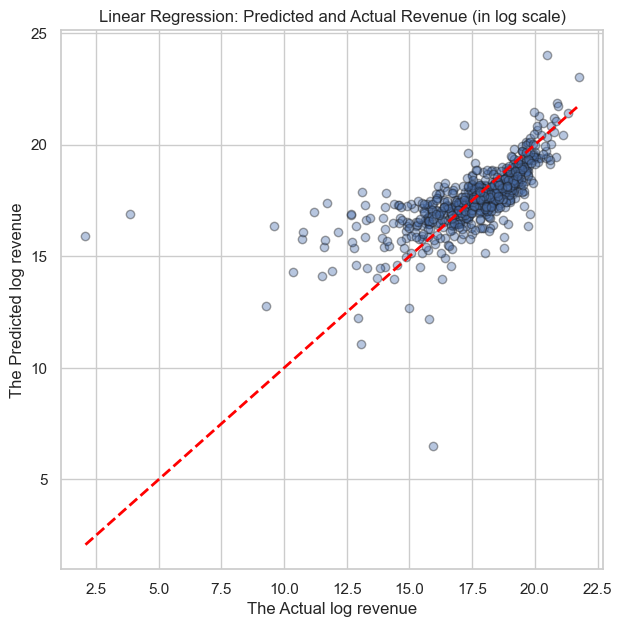

In [43]:
import matplotlib.pyplot as plt

# Scatterplot
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolor="k")

# Perfect prediction line in the scatterplot
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", lw=2)

plt.xlabel("The Actual log revenue")
plt.ylabel("The Predicted log revenue")
plt.title("Linear Regression: Predicted and Actual Revenue (in log scale)")
plt.show()

- **Comments R2: 0.4630:** The Linear Regression model explains approximately 46% of the variation in the target variable (that is, the log-transformed revenue variable). In other words, half of the differences in movie revenues can be explained by the features we chose in our model, while the remaining 54% is explained by factors outside of our model. 

- **Comments RMSE: 1.4995:** while it is more complex to interpret this number in the context of the question we have about revenue, we can argue that the model is off by **1.5 log (units) points** on average from true log revenue (the average size error between predicted and actual values). The precision is not quite high and what this means for the data is that predicitions are off by **4.5x on average**, which can be acceptable for small movies. But with large blockbuster movies in the multi-million to billion dollars category, the deviation from average suggest that the gap is too large because the difference may be in the hundreds of millions of USD. To adress this limitation we will turn to non-linear models of Random Forest and Gradient boosting for analyzing whether there are other effects that influence the data that might be non-linear.

- **Comments on the scatterplot:** the more points (one point = one movie) on the red line, the better is the model. The plot shows that most of the movies have high revenue and are at the upper-right quadrant. The regression line is able to capture these generally well. However, there are a few points (movies) that are far away from the model and can be seen scattered on the upper-left and lower-right quadrants of the plot:
    - *The upper-left dots* are predicted by the model to be high but are actually low (the model *overestimates* the revenue of smaller movies).
    
    - *The lower-right dots* shows that the model *underestimates* revenue of big movies that in reality have high revenue.

### 5.2. Random Forest

##### [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) is a robust model that can give analytical insights into the data because it: 
- a) captures non-linear relationships, 
- b) is well-suited for tabular data like the movie dataset and 
- c) creates several decision trees that are trained separately and its predictions are averaged.

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Creating the Random Forest model
rf = RandomForestRegressor(
    n_estimators=300, # the number of trees created, the more the better performance in general but may slow down the process.
    max_depth=15, # the control tree depth - the deeper the tree the more complex it becomes and more risk for overfitting.
    random_state=42, # random state - the number of times the same random sampling is run.
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions
y_pred_log = rf.predict(X_test)

# Evaluation of the model in log space
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)

print(f"Random Forest - R² (log space): {r2_log:.3f}")
print(f"Random Forest - RMSE (log space): {rmse_log:.3f}")

# For interpretation, the predictions are converted back to real revenue in USD
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Random Forest - RMSE (USD): ${rmse_actual:,.0f}")

Random Forest - R² (log space): 0.611
Random Forest - RMSE (log space): 1.277
Random Forest - RMSE (USD): $126,053,523


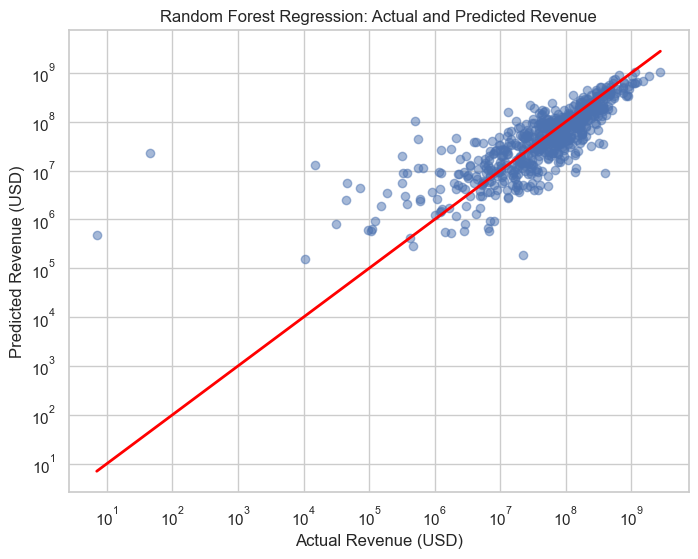

In [54]:
# Plot of Random Forest results
plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color="red", lw=2)  # the perfect prediction line in the plot

plt.xlabel("Actual Revenue (USD)")
plt.ylabel("Predicted Revenue (USD)")
plt.title("Random Forest Regression: Actual and Predicted Revenue")
plt.xscale("log")
plt.yscale("log")
plt.show()




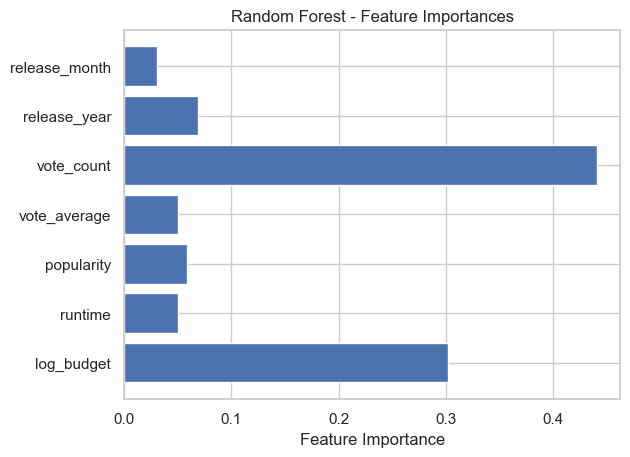

In [53]:
# Feature Importance Plot: explaining why the Random forest model is predicting like it does
importances = rf.feature_importances_
feat_names = X.columns

plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.show()



### Comments on the results from the Random Forest model and feature importance:
- **Random Forest - R² (log space): 0.611:** - this means that the Random Forest model explains 61% of the variation in log-revenue 
which is an improvement with 15% over the Linear Regression model (0.46 or 46%). The predicitions in the Random forest model is on average off by $126 million USD, which seems to be large but considering the large movie revenue span range from few million to billions USD, it is reasonable. 
- **Feature importance in the Random Forest model:**
- **vote_count ≈ 0.45+**
- **log_budget ≈ 0.30**
- **Others < 0.10**
- **Summary:** vote_count (the user ratings count on TMDB) is the strongest predictor of revenue. It alone contributes almost half or 45% of the model's total decision power. This makes sense since movies that are popular and many people watch get more votes. The second strongest predictor, log_budget, is the second strongest with around a third or 30% of the total decision power. This is explainable due to the bigger the budget the more money is made - although it is not always necessary that a big movie will be profitable. This makes sense since movies that are popular and that many people watch get more votes. The second strongest predictor, log_budget, means bigger production, more famous actors and marketing and therefore more revenue, but not all of them make money. The other features were not strong predictors and cannot explain movie revenue.


### 5.3. Gradient Boosting

##### [Gradient Boosting model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) is also able to capture non-linear relationships but it differs from Random forest in important ways. In Gradient boosting model, the trees are trained sequentially (the current tree is improved from the previoues tree) which may potentially lead to an even more powerful model that can discover previously undetected complex non-linear patterns while also reducing error in the model.

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,    # number of boosting stages (or trees). 
    learning_rate=0.05,  # shrinkage rate (how much the trees will influence the final prediction. Small values is more gradual and stable)
    max_depth=5,         # the depth of individual trees, which controls the complexity
    random_state=42      # makes reproducibility possible
)

# trains the model
gbr.fit(X_train, y_train)

# makes the prediction on the test data, which this model has not seen before.
y_pred_gbr = gbr.predict(X_test)

# Evaluation of the model in log space. 
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - R² (log space): {r2_gbr:.3f}")
print(f"Gradient Boosting - RMSE (log space): {rmse_gbr:.3f}")

# This transforms the log scale back to real USD for interpretation
y_pred_actual_gbr = np.expm1(y_pred_gbr)
rmse_actual_gbr = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual_gbr))
print(f"Gradient Boosting - RMSE (USD): ${rmse_actual_gbr:,.0f}")

Gradient Boosting - R² (log space): 0.591
Gradient Boosting - RMSE (log space): 1.309
Gradient Boosting - RMSE (USD): $124,654,656


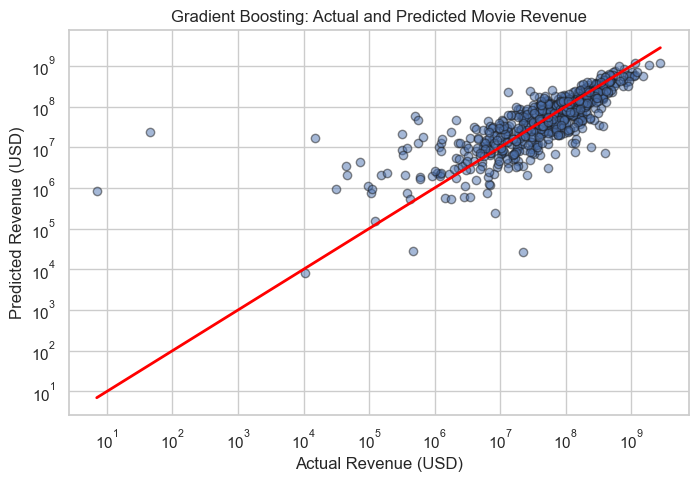

In [50]:
# Scatter plot over the Gradient boosting model for Actual and Predicted Revenue
plt.figure(figsize=(8,5))
plt.scatter(y_test_actual, y_pred_actual_gbr, alpha=0.5, edgecolor='k')

# Perfect prediction line (y = x)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color="red", lw=2)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Actual Revenue (USD)")
plt.ylabel("Predicted Revenue (USD)")
plt.title("Gradient Boosting: Actual and Predicted Movie Revenue")
plt.show()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


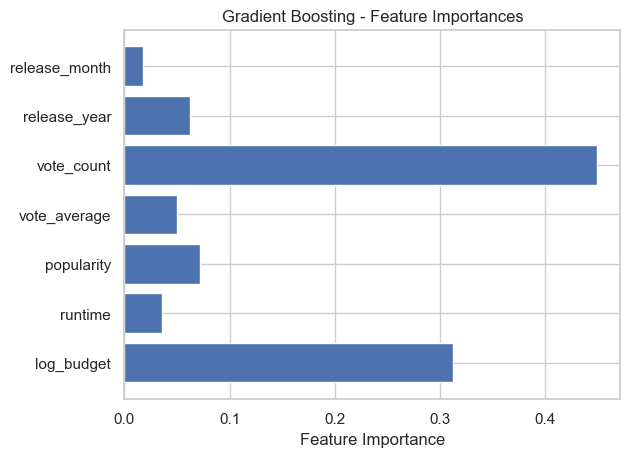

In [57]:
# Visualizing the results of Gradient boosting model
importances_gbr = gbr.feature_importances_
feat_names = X.columns

plt.barh(feat_names, importances_gbr)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting - Feature Importances")
plt.show()

### Comments on the results from the Gradient Boost model and feature importance:
- **Gradient Boosting - R² (log space): 0.591:** the Gradient Boosting model explains about 59% of the variation in log-revenue 
which is an improvement with 13% over the Linear Regression model (0.46 or 46%) but it is 2% less than the Random Forest model (61%). The predictions in the Random forest model is off by $125 million USD on average.
- **Feature importance in the Random Forest model:**
- **vote_count ≈ 0.45+**
- **log_budget ≈ 0.30**
- **Others < 0.10**
- **Summary:** As in the Random forest model, vote_count (the user ratings count on TMDB) is the strongest predictor of revenue with a contribution of almost 45% of the model's total decision power. This makes sense since movies that are popular and many people watch get more votes. The second strongest predictor, log_budget, contributes with 30% of the model's total decision power. This means that at least in third of the cases, the bigger the budget the more money is made. However, it must also be said the bigger budget does not always necessary means that a big-budget movie will be profitable because they may underperform or very small movies earn comparatively very high revenue.

### 5.4.Model Comparison and Conclusion

In [52]:
# Summary table of the results from the three models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "R² (log space)": [0.46, 0.61, 0.59],
    "RMSE (USD)": ["Higher error", "$126M", "$125M"]
})

print(results)


               Model  R² (log space)    RMSE (USD)
0  Linear Regression            0.46  Higher error
1      Random Forest            0.61         $126M
2  Gradient Boosting            0.59         $125M



#### 5.4.1. Model comparison:
- As can be seen, the Random Forest Model performed best by explaining 61% of the variation in the log-transformed revenue, and an average error of 126 million USD per movie. Not far away from this prediciton was the Gradient Boosting Model at 59% explanation of the variaton. In summary, the tree-based and non-linear methods of Random Forest and Gradient Boosting outperformed Linear Regression for predicting movie revenue. This means that these models can better capture the complexity of the box office data. 

#### 5.4.2. Limitations:
- *Data quality:* several features like distribution, marketing, number of screens and cast effects are not included in the project, but they could affect the data and how the model works. 
- *Predictive power:*
    - *R2 issue:* the strongest model could explain 61% of the variation, which leaves almost 40% of the variation unexplained due to factors not included in the model.
    - *RMSE (Root Mean Squared Error) issue:* all models have a high RMSE error. This means that if a movie with a 100 USD million budget is predicted to get 300 USD million in revenue, the Random forest model would predict the movie revenue to be around 175 to 425 USD million, the Gradient boosting would predict it to be around 174-426 USD million and Linear Regression even higher than that.  So if a model would predict a movie to get revenue of the range of 50 USD million, our models would say -75 USD million to 175 USD million which does not make sense in reality. But this illustrates the volatility in small and blockbuster movies and the unpredictability of the data. It also shows that there may be other variables (features) to be included to decrease the RMSE.
      
- *Missing external validation:* this was only tested on the TMDB dataset which limits the validation of the results and capability of generalizing the results.
- *The strongest predictor 'vote_count':* there is ambiguity as to whether this predictor may reflect the audience popularity *after* the movie has been released **(post-release popularity)**. This makes its capability of being a pre-release predictive power questionable.   

#### 5.4.3. Conclusion:
- The purpose of this project was to predict box office movie success. This was done by trying to explain our target variable **movie revenue**. How much revenue a movie has made is the determinant for box office success. From the models analyzed we can argue that **vote count is the strongest predictor for movie revenue with explaining almost half of the success**. Also and not far from the strongest predictor was **the second strongest predictor, movie budget, that predicts about a third of the cases**. Other features like release year and release month, vote average, popularity and runtime are negligble in the models that were tested. 



### 6. Future work 

**1. Improving data quality**
- Include more movie datasets for improving the features in the models. The more data that is included in the dataset, the more quality we can analyze. 

**2. Model enhancements**
- Improve the Random Forest and Gradient Boosting models by tuning hyperparameters (tree depth, learning rate and number of estimators) with hyperparameter tuning tools from Skicit like **RandomizedSearchCV** or **GridSearchCV**. These tools can systematically test several combinations of hyperparameters to present which ones are the best.
- Change to **Ridge regression**. As was seen in the linear regression model, we got numerical warnings due to extreme values and numerical instability. Here we argued that since `revenue` is a continuous variable the useage of the linear regression model makes conceptually sense. An improvement in case would be to change to a ridge regression model to mitigate the numerical warnings because it gives a penalty to the model when there are extreme numbers or instability. 

**3. Improving evaluation**
- For more robust model performance estimations, we could preferably implement cross-validations in terms of evalutating the model across various movie segments (e.g. low-budget versus high budget/blockbusters across different genres).

**4. For business applications**
- Make a framework for pre-release revenue prediction that excludes 'vote_count' which is post-release data.


### 7. References

- **Dataset used:** 
    - *TMDB 5000 Movies Dataset* - originally from [Kaggle: The Movies Dataset] (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)


- **Libraries used:** 

    - [Matplotlib](https://matplotlib.org/) 

    - [NumPy](https://numpy.org/)

    - [Pandas](https://pandas.pydata.org/) 
    - [Scikit-learn](https://scikit-learn.org/stable/) :
        - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) 
        - [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 
        - [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
        - [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
        - [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) 
        - [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
        - [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 
    
    - [Seaborn](https://seaborn.pydata.org/) 